In [1]:
import cPickle as pkl
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
%matplotlib inline
matplotlib.style.use('ggplot')

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:1407: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
filepath = "../../results/updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah_20170331_2025_200000_ribosomes_3600s.p"

In [3]:
results = pkl.load(open(filepath))

In [4]:
print results.keys()

['n_tRNA', 'description', 'n_ribosomes', 'timerange', 'proteome', 'transcriptome', 'time_stamp', 'duration', 'peptide_bonds', 'timecourses']


In [5]:
timerange = results['timerange']
ribos_bound = results['timecourses']['ribos._bound']
trnas_bound = results['timecourses']['tRNA_bound']

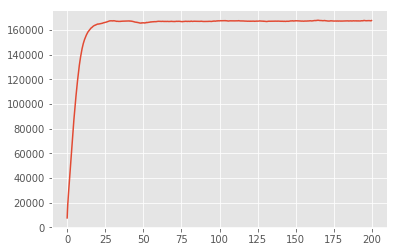

In [6]:
plt.plot(timerange[:1000], ribos_bound[:1000])

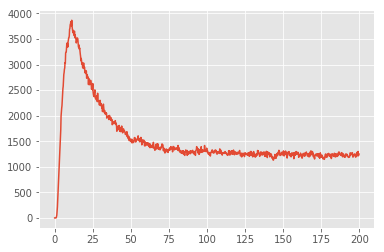

In [7]:
plt.plot(timerange[:1000], trnas_bound[:1000])

In [25]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'

In [26]:
x = timerange[:1000]
y = ribos_bound[:1000]
z = trnas_bound[:1000]

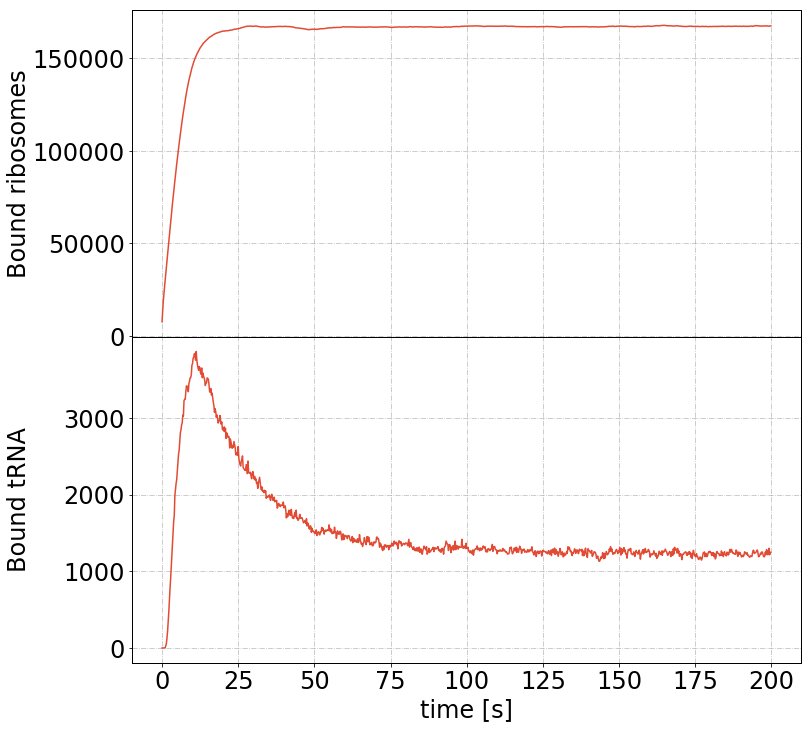

In [27]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)

myfontsize = 24
ax1.tick_params(axis='both', which='major', labelsize=myfontsize)
ax2.tick_params(axis='both', which='major', labelsize=myfontsize)

ax2.set_xlabel("time [s]", fontsize=myfontsize)
ax1.set_ylabel("Bound ribosomes", fontsize=myfontsize)
ax2.set_ylabel("Bound tRNA", fontsize=myfontsize)

ax1.get_yaxis().set_label_coords(-0.15, 0.5)
ax2.get_yaxis().set_label_coords(-0.15, 0.5)

ax1.plot(x, y)
#ax1.set_title('Sharing both axes')
ax2.plot(x, z)
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False);

ax1.grid(b=True)
ax2.grid(b=True)

ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', colors='black')
ax1.xaxis.label.set_color('black')
ax1.yaxis.label.set_color('black')

ax2.tick_params(axis='x', colors='black')
ax2.tick_params(axis='y', colors='black')
ax2.xaxis.label.set_color('black')
ax2.yaxis.label.set_color('black')

y_ticks = ax2.yaxis.get_major_ticks()
y_ticks[5].set_visible(False)

plt.savefig('TRSL_specific_bound_ribos_bound_tRNAs.pgf', bbox_inches='tight')